# **DATA EXPLORATION**

---

In [1]:
import pandas as pd

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [2]:
print(movies['genres'].unique())
print(ratings['rating'].unique())
print(tags['tag'].unique())

['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horror|Thriller' 'Comedy|Horror|Romance'


In [3]:
print(movies.isnull().sum())
print(ratings.isnull().sum())
print(tags.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [4]:
# Cek Struktur dan Tipe Data
movies.info()
ratings.info()
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-nul

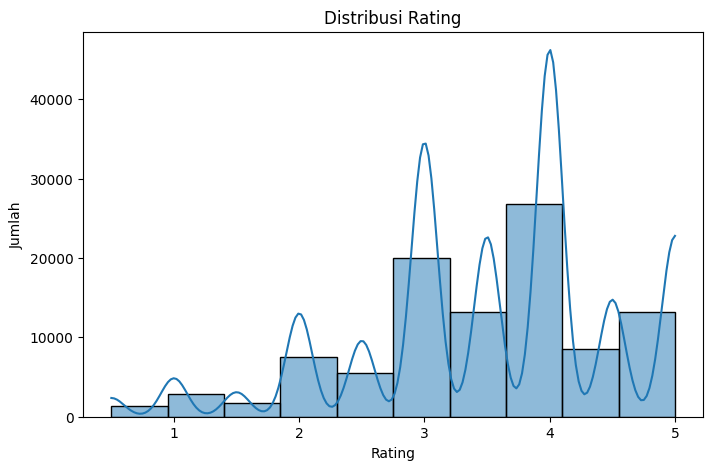

In [5]:
# distribusi rating
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

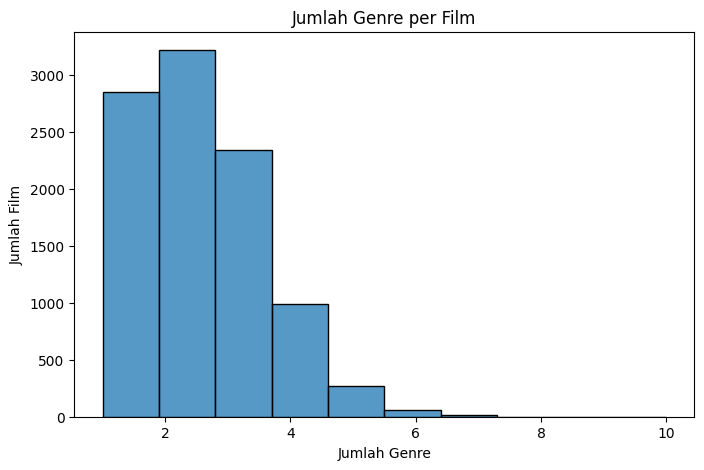

In [6]:
# Hitung jumlah genre per film
movies['genre_count'] = movies['genres'].apply(lambda x: len(x.split('|')) if pd.notnull(x) else 0)

# Plot distribusi jumlah genre per film
plt.figure(figsize=(8, 5))
sns.histplot(movies['genre_count'], bins=10)
plt.title("Jumlah Genre per Film")
plt.xlabel("Jumlah Genre")
plt.ylabel("Jumlah Film")
plt.show()

In [7]:
# Statistik Deskriptif

print("\nStatistik Deskriptif Rating:")
print(ratings['rating'].describe())


Statistik Deskriptif Rating:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


In [8]:
# Jumlah genre unik
print("\nDistribusi Genre:")
print(movies['genres'].value_counts())


Distribusi Genre:
genres
Drama                                        1053
Comedy                                        946
Comedy|Drama                                  435
Comedy|Romance                                363
Drama|Romance                                 349
                                             ... 
Children|Drama|Musical                          1
Adventure|Drama|Horror|Mystery|Thriller         1
Adventure|Children|Comedy|Fantasy|Mystery       1
Adventure|Animation|Children|Western            1
Comedy|Mystery|Romance|Thriller                 1
Name: count, Length: 951, dtype: int64


In [9]:
# Jumlah user aktif
user_activity = tags['userId'].value_counts()
print(f"\nJumlah User Aktif: {len(user_activity)}")
print("Top 5 User paling aktif:\n", user_activity.head())


Jumlah User Aktif: 58
Top 5 User paling aktif:
 userId
474    1507
567     432
62      370
599     323
477     280
Name: count, dtype: int64


In [10]:
# Film paling sering ditonton
movie_popularity = tags['movieId'].value_counts()
top_movies = movies.merge(movie_popularity.rename("watch_count"), left_on='movieId', right_index=True)
print("\nTop 5 Film yang Paling Sering Ditonton:")
print(top_movies[['title', 'watch_count']].sort_values(by='watch_count', ascending=False).head())


Top 5 Film yang Paling Sering Ditonton:
                                                  title  watch_count
257                                 Pulp Fiction (1994)          181
2226                                  Fight Club (1999)           54
706                        2001: A Space Odyssey (1968)           41
254   Léon: The Professional (a.k.a. The Professiona...           35
4909       Eternal Sunshine of the Spotless Mind (2004)           34


# **DATA PREPARATION**


---

## Movies


Pisahkan kolom tahun


In [11]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['title'] = movies['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

movies.head()

,movieId,title,genres,genre_count,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,1995
1,2,Jumanji,Adventure|Children|Fantasy,3,1995
2,3,Grumpier Old Men,Comedy|Romance,2,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,3,1995
4,5,Father of the Bride Part II,Comedy,1,1995


In [12]:
movies.isnull().sum()

movieId         0
title           0
genres          0
genre_count     0
year           13
dtype: int64

In [13]:
movies.dropna(subset=['year'], inplace=True)

In [14]:
movies.isnull().sum()

movieId        0
title          0
genres         0
genre_count    0
year           0
dtype: int64

One-hot Encoding

In [15]:
# Perform one-hot encoding on the 'genres' column
genres_encoded = movies['genres'].str.get_dummies(sep='|')

# Combine the one-hot encoded columns back with the original dataframe
movies_encoded = pd.concat([movies, genres_encoded], axis=1)

movies_encoded.drop('genres', axis=1, inplace=True)

# Display the first few rows of the updated dataframe
movies_encoded.head()

,movieId,title,genre_count,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,5,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,3,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,2,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,3,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Export menjadi file csv

In [16]:
movies_encoded.to_csv('movies_processed.csv', index=False)

## Tags

In [17]:
import re
from sklearn.feature_extraction.text import CountVectorizer

Rapihkan format penulisan di kolom tag

In [18]:
# 1. Convert to lowercase
tags['tag'] = tags['tag'].str.lower()

# 2. Remove punctuation and special characters (keep only letters, numbers, and spaces)
tags['tag'] = tags['tag'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# 3. Remove extra spaces (strip leading/trailing, replace multiple spaces with single)
tags['tag'] = tags['tag'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,boxing story,1445715207
4,2,89774,mma,1445715200


Satukan tag dengan movie id yang sama

In [19]:
movie_tags = tags.groupby('movieId')['tag'].apply(lambda x: " ".join(x)).reset_index()
movie_tags.rename(columns={'tag': 'combined_tags'}, inplace=True)

movie_tags.head()

,movieId,combined_tags
0,1,pixar pixar fun
1,2,fantasy magic board game robin williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake


In [20]:
vectorizer = CountVectorizer()
tag_features_sparse = vectorizer.fit_transform(movie_tags['combined_tags'])
feature_names = vectorizer.get_feature_names_out()
tag_features_df = pd.DataFrame(tag_features_sparse.toarray(), columns=feature_names)

print("Shape of the vectorized tag features:", tag_features_df.shape)

Shape of the vectorized tag features: (1572, 1756)


In [21]:
print("\nTop 10 unique tag features (vocabulary):")
# Get feature names from the vectorizer and print the first 10 if available
feature_names = vectorizer.get_feature_names_out()
print(feature_names[:10])


Top 10 unique tag features (vocabulary):
['06' '1900s' '1920s' '1950s' '1960s' '1970s' '1980s' '1990s' '2001like'
 '250']


In [22]:
print("\nFirst 5 rows of 'tags' DataFrame after text cleaning:")
print(tags.head().to_markdown(index=False, numalign="left", stralign="left"))


First 5 rows of 'tags' DataFrame after text cleaning:
| userId   | movieId   | tag             | timestamp   |
|:---------|:----------|:----------------|:------------|
| 2        | 60756     | funny           | 1445714994  |
| 2        | 60756     | highly quotable | 1445714996  |
| 2        | 60756     | will ferrell    | 1445714992  |
| 2        | 89774     | boxing story    | 1445715207  |
| 2        | 89774     | mma             | 1445715200  |


In [23]:
print("\nFirst 5 rows of 'movie_tags' DataFrame with combined tags:")
print(movie_tags.head().to_markdown(index=False, numalign="left", stralign="left"))


First 5 rows of 'movie_tags' DataFrame with combined tags:
| movieId   | combined_tags                                |
|:----------|:---------------------------------------------|
| 1         | pixar pixar fun                              |
| 2         | fantasy magic board game robin williams game |
| 3         | moldy old                                    |
| 5         | pregnancy remake                             |
| 7         | remake                                       |


Simpan hasil

In [24]:
tag_features_df['movieId'] = movie_tags['movieId']
tag_features_df = tag_features_df[['movieId'] + [col for col in tag_features_df.columns if col != 'movieId']]

tag_features_df.to_csv('tags_processed.csv', index=False)

## Merge Dataset

In [25]:
# import pandas as pd

# # 1. Memuat semua dataset yang sudah diproses
# movies_df = pd.read_csv('movies_processed.csv')
# ratings_df = pd.read_csv('ratings.csv')
# tags_df = pd.read_csv('tags_processed.csv') # Ini berisi movieId dan combined_tags

# print("Movies_df head:\n", movies_df.head().to_markdown(index=False, numalign="left", stralign="left"))
# print("\nRatings_df head:\n", ratings_df.head().to_markdown(index=False, numalign="left", stralign="left"))
# print("\nTags_df head:\n", tags_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# # 3. Menggabungkan semua DataFrame
# # Gabungkan ratings_df dengan movies_df berdasarkan movieId
# df_merged = pd.merge(ratings_df, movies_df, on='movieId', how='left')

# # Gabungkan hasil dengan tags_df berdasarkan movieId
# df_merged = pd.merge(df_merged, tags_df, on='movieId', how='left')

# print("\nShape dari DataFrame gabungan setelah merge awal:", df_merged.shape)
# print("Jumlah nilai null di setiap kolom setelah merge awal:")
# print(df_merged.isnull().sum().to_markdown(numalign="left", stralign="left"))

# # 4. Mengisi semua nilai NaN dengan 0
# df_merged.fillna(0, inplace=True)

# print("\nJumlah nilai null di setiap kolom setelah mengisi NaN:")
# print(df_merged.isnull().sum().to_markdown(numalign="left", stralign="left"))

# # 5. Menampilkan hasil akhir
# print("\nDataFrame gabungan akhir (head):")
# print(df_merged.head().to_markdown(index=False, numalign="left", stralign="left"))

# print("\nInformasi DataFrame gabungan akhir:")
# print(df_merged.info())

In [26]:
# df_merged.to_csv('df_merged.csv', index=False)

##  df_merged 

In [27]:
df_merged = pd.read_csv('df_merged.csv')

In [28]:
df_merged.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
            ..
zither       0
zoe          0
zombie       0
zombies      0
zooey        0
Length: 1782, dtype: int64

## **DATA MODELLING & EVALUATION**

---

## Collaborative Filtering

In [29]:
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [30]:
user_item_matrix = df_merged.pivot_table(index='userId', columns='movieId', values='rating')
user_item_matrix_filled = user_item_matrix.fillna(0)
print("\nShape matriks pengguna-item:", user_item_matrix_filled.shape)
print("Contoh matriks pengguna-item (5x5 pertama):\n", user_item_matrix_filled.iloc[:5, :5].to_markdown())


Shape matriks pengguna-item: (610, 9724)
Contoh matriks pengguna-item (5x5 pertama):
 |   userId |   1 |   2 |   3 |   4 |   5 |
|---------:|----:|----:|----:|----:|----:|
|        1 |   4 |   0 |   4 |   0 |   0 |
|        2 |   0 |   0 |   0 |   0 |   0 |
|        3 |   0 |   0 |   0 |   0 |   0 |
|        4 |   0 |   0 |   0 |   0 |   0 |
|        5 |   4 |   0 |   0 |   0 |   0 |


test split

In [31]:
train_matrix = user_item_matrix_filled.copy()
test_matrix = user_item_matrix_filled.copy()

np.random.seed(42)

for user in user_item_matrix_filled.index:
    rated_movies = user_item_matrix_filled.loc[user][user_item_matrix_filled.loc[user] > 0].index
    if len(rated_movies) > 0:
        num_test_movies = int(0.2 * len(rated_movies))
        if num_test_movies == 0 and len(rated_movies) > 0:
            num_test_movies = 1
        
        if num_test_movies > len(rated_movies):
            num_test_movies = len(rated_movies)

        test_movies = np.random.choice(rated_movies, size=num_test_movies, replace=False)
        train_matrix.loc[user, test_movies] = 0

terapkan NMF

In [32]:
# n_components = 150 # Anda bisa coba nilai lain untuk tuning

# model_nmf = NMF(n_components=n_components, init='nndsvda', random_state=42, max_iter=1000)

# print(f"\nMelatih model NMF dengan {train_matrix.shape[0]} pengguna dan {train_matrix.shape[1]} film...")
# # Melatih model NMF pada matriks training
# W = model_nmf.fit_transform(train_matrix)
# H = model_nmf.components_

# print(f"Shape dari matriks fitur pengguna (W): {W.shape}")
# print(f"Shape dari matriks fitur item (H): {H.shape}")

# predicted_ratings_matrix = np.dot(W, H)
# predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.columns)

# test_indices_row, test_indices_col = np.where(test_matrix > 0)
# actual_ratings = test_matrix.values[test_indices_row, test_indices_col]
# predicted_for_actual = predicted_ratings_df.values[test_indices_row, test_indices_col]

# rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_for_actual))
# print(f"RMSE pada data uji (rating yang disembunyikan, 80% data): {rmse:.4f}")

terapkan SVD

In [33]:
# param_grid = {
#     'n_components': [50, 100, 200, 300, 400, 500, 550, 600, 610] 
# }

# best_rmse = float('inf')
# best_n_components = -1
# results = []

# for n_components in param_grid['n_components']:
#     print(f"\nMencoba n_components = {n_components}...")

#     # Pastikan train_matrix dan test_matrix diinisialisasi ulang per iterasi
#     train_matrix = train_matrix.copy()
#     test_matrix = test_matrix.copy()

#     model_svd = TruncatedSVD(n_components=n_components, random_state=42)

#     # Melatih model TruncatedSVD
#     U = model_svd.fit_transform(train_matrix)
#     Vt = model_svd.components_

#     # Rekonstruksi Matriks Rating (Prediksi)
#     predicted_ratings_matrix = np.dot(U, Vt)
#     predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.columns)

#     # Evaluasi Model
#     test_indices_row, test_indices_col = np.where(test_matrix > 0)
#     actual_ratings = test_matrix.values[test_indices_row, test_indices_col]
#     predicted_for_actual = predicted_ratings_df.values[test_indices_row, test_indices_col]

#     rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_for_actual))
#     print(f"RMSE untuk n_components = {n_components}: {rmse:.4f}")

#     results.append({'n_components': n_components, 'rmse': rmse})

#     if rmse < best_rmse:
#         best_rmse = rmse
#         best_n_components = n_components

# print("\n--- Hasil Grid Search ---")
# results_df = pd.DataFrame(results).sort_values(by='rmse', ascending=True)
# print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

# print(f"\nNilai n_components terbaik adalah: {best_n_components} dengan RMSE: {best_rmse:.4f}")

In [34]:
n_components = 600
model_svd = TruncatedSVD(n_components=n_components, random_state=42)
print(f"\nMelatih model TruncatedSVD dengan {train_matrix.shape[0]} pengguna, {train_matrix.shape[1]} film, n_components={n_components}...")
U = model_svd.fit_transform(train_matrix) 
Vt = model_svd.components_

print(f"Shape dari matriks fitur pengguna (U): {U.shape}")
print(f"Shape dari matriks fitur item (Vt): {Vt.shape}")

predicted_ratings_matrix = np.dot(U, Vt)
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.columns)


Melatih model TruncatedSVD dengan 610 pengguna, 9724 film, n_components=600...
Shape dari matriks fitur pengguna (U): (610, 600)
Shape dari matriks fitur item (Vt): (600, 9724)


evaluasi

In [35]:
test_indices_row, test_indices_col = np.where(test_matrix > 0)

actual_ratings = test_matrix.values[test_indices_row, test_indices_col]
predicted_for_actual = predicted_ratings_df.values[test_indices_row, test_indices_col]

rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_for_actual))
print(f"RMSE pada data uji (rating yang disembunyikan, 20% data): {rmse:.4f}")# 

RMSE pada data uji (rating yang disembunyikan, 20% data): 1.6225


## Klasifikasi

Random Forest

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier # Import classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # Metrik klasifikasi
import numpy as np

In [37]:
# rating_threshold = 3.5

# df_merged['liked'] = (df_merged['rating'] >= rating_threshold).astype(int)

# print(f"\nDistribusi kelas 'liked' (Rating >= {rating_threshold}):")
# print(df_merged['liked'].value_counts().to_markdown())

# exclude_cols_from_features = ['userId', 'movieId', 'rating', 'timestamp', 'title', 'liked']

# # Ambil semua kolom yang tidak ada dalam daftar pengecualian
# feature_cols = [col for col in df_merged.columns if col not in exclude_cols_from_features]

# X = df_merged[feature_cols]
# y = df_merged['liked']

# print(f"\nShape dari Fitur (X): {X.shape}")
# print(f"Shape dari Target (y): {y.shape}")


In [38]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# # stratify=y penting untuk klasifikasi biner agar distribusi kelas di train/test mirip

# print(f"\nShape X_train: {X_train.shape}, y_train: {y_train.shape}")
# print(f"Shape X_test: {X_test.shape}, y_test: {y_test.shape}")

# print("\nMelatih RandomForestClassifier...")
# classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 untuk menggunakan semua core CPU
# classifier.fit(X_train, y_train)
# print("Classifier berhasil dilatih.")

In [39]:
user_item_matrix = df_merged.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
n_components_svd = 600
svd_model = TruncatedSVD(n_components=n_components_svd, random_state=42)

# U adalah matriks fitur pengguna (userId, n_components)
U = svd_model.fit_transform(user_item_matrix)
# Vt adalah matriks fitur item (n_components, movieId)
Vt = svd_model.components_

# Konversi U dan Vt menjadi DataFrame agar mudah digabungkan
user_latent_features_df = pd.DataFrame(U, index=user_item_matrix.index, 
                                     columns=[f'user_latent_{i+1}' for i in range(n_components_svd)])
# --- BARIS KODE YANG DITAMBAHKAN UNTUK FITUR LATEN ITEM ---
item_latent_features_df = pd.DataFrame(Vt.T, index=user_item_matrix.columns, # Transpose Vt agar movieId menjadi index
                                     columns=[f'item_latent_{i+1}' for i in range(n_components_svd)])


# Gabungkan fitur laten pengguna dan item ke df_merged
df_merged = pd.merge(df_merged, user_latent_features_df, on='userId', how='left')
# --- BARIS KODE YANG DITAMBAHKAN UNTUK MERGE FITUR LATEN ITEM ---
df_merged = pd.merge(df_merged, item_latent_features_df, on='movieId', how='left')

# Pastikan tidak ada NaN yang muncul dari merge fitur laten (jika ada movieId/userId baru yang tidak ada di matriks asli)
df_merged.fillna(0, inplace=True)
print("DataFrame gabungan dengan fitur laten siap.")
print(f"Shape DataFrame setelah penambahan fitur laten: {df_merged.shape}")

DataFrame gabungan dengan fitur laten siap.
Shape DataFrame setelah penambahan fitur laten: (100836, 2982)


In [40]:
rating_threshold = 3.5
df_merged['liked'] = (df_merged['rating'] >= rating_threshold).astype(int)

exclude_cols_from_features = ['userId', 'movieId', 'rating', 'timestamp', 'title', 'liked']

# Ambil semua kolom yang tidak ada dalam daftar pengecualian
X = df_merged.drop(columns=exclude_cols_from_features) # Cara yang lebih langsung
y = df_merged['liked']

feature_columns_order = X.columns.tolist()

print(f"\nShape dari Fitur (X) dengan fitur laten: {X.shape}")
print(f"Shape dari Target (y): {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test.shape}")

# Tentukan grid parameter yang ingin Anda uji
# Untuk pengujian cepat, mulai dengan grid yang tidak terlalu besar
param_grid = {
    'n_estimators': [50, 100], # Jumlah pohon dalam forest
    'max_depth': [10, 20], # Kedalaman maksimum pohon
    'min_samples_split': [2], # Jumlah sampel minimum untuk membagi node
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc', # Atau 'f1' jika F1-score lebih penting
    cv=2, # Coba dengan cv=3 (3-fold cross-validation) untuk kecepatan
    n_jobs=1,
    verbose=2
)

# Latih GridSearchCV pada data pelatihan
grid_search.fit(X_train, y_train)

print(f"Parameter terbaik: {grid_search.best_params_}")
print(f"Skor (ROC AUC) terbaik pada validasi silang: {grid_search.best_score_:.4f}")

# Dapatkan model terbaik
best_classifier = grid_search.best_estimator_



Shape dari Fitur (X) dengan fitur laten: (100836, 2977)
Shape dari Target (y): (100836,)

Shape X_train: (80668, 2977), y_train: (80668,)
Shape X_test: (20168, 2977), y_test: (20168,)
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  29.9s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  26.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  50.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  55.2s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=  45.7s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=  44.8s
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time= 1.5min
[CV] END max_depth=20, min_samples_split=2, n_estimators=100; total time= 1.5min
Parameter terbaik: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Skor (ROC AUC) terbaik pad

In [41]:
print("\nMengevaluasi Classifier...")

y_pred = best_classifier.predict(X_test)
y_proba = best_classifier.predict_proba(X_test)[:, 1] # Probabilitas kelas positif (1)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")


Mengevaluasi Classifier...
Accuracy: 0.7573
Precision: 0.7578
Recall: 0.8870
F1-Score: 0.8173
ROC AUC Score: 0.8258


## Classifier

In [44]:
movies = pd.read_csv('movies_processed.csv')
tags = pd.read_csv('tags_processed.csv')

In [42]:
all_movie_features_df = pd.merge(movies, tags, on='movieId', how='left')
all_movie_features_df = pd.merge(all_movie_features_df, item_latent_features_df, on='movieId', how='left')
all_movie_features_df.fillna(0, inplace=True)

def get_movie_recommendations_for_user(user_id, classifier_model, n=10):
    """
    Menghasilkan rekomendasi film untuk pengguna tertentu, termasuk penanganan cold start.

    Args:
        user_id (int): ID pengguna yang akan direkomendasikan.
        classifier_model: Model classifier (best_classifier) yang sudah dilatih.
        n (int): Jumlah rekomendasi film teratas yang diinginkan.

    Returns:
        pd.DataFrame: DataFrame berisi film yang direkomendasikan (movieId, title, year, predicted_proba).
    """
    print(f"\nMencari rekomendasi untuk User ID: {user_id}...")

    # --- PENANGANAN COLD START PENGGUNA BARU ---
    if user_id not in user_latent_features_df.index:
        print(f"User ID {user_id} adalah pengguna baru (cold start). Merekomendasikan film populer secara umum.")
        top_overall_movies_ids = ratings.groupby('movieId')['rating'].mean().nlargest(n).index
        recommendations = movies[movies['movieId'].isin(top_overall_movies_ids)].copy()
        recommendations['predicted_proba'] = 'N/A'
        return recommendations[['movieId', 'title', 'year', 'predicted_proba']]

    # --- PENANGANAN PENGGUNA LAMA (yang sudah ada datanya) ---
    watched_movie_ids = ratings[ratings['userId'] == user_id]['movieId'].tolist()
    unwatched_movies_df = all_movie_features_df[~all_movie_features_df['movieId'].isin(watched_movie_ids)].copy()

    if unwatched_movies_df.empty:
        print(f"User ID {user_id} telah menonton semua film atau tidak ada film yang tersisa untuk direkomendasikan.")
        return pd.DataFrame(columns=['movieId', 'title', 'year', 'predicted_proba'])

    user_lfs = user_latent_features_df.loc[user_id]
    X_predict = unwatched_movies_df[feature_columns_order].copy()

    for col_name, value in user_lfs.items():
        X_predict[col_name] = value
    X_predict = X_predict[feature_columns_order]

    predicted_proba = classifier_model.predict_proba(X_predict)[:, 1]
    unwatched_movies_df['predicted_proba'] = predicted_proba
    top_n_recommendations = unwatched_movies_df.sort_values(by='predicted_proba', ascending=False).head(n)

    final_recommendations = top_n_recommendations[['movieId', 'title', 'year', 'predicted_proba']]
    return final_recommendations



--- Visualisasi Metrik Performa Model ---


C:\Users\ASUS\AppData\Local\Temp\ipykernel_26192\2151486591.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=metrics_df, palette="viridis")


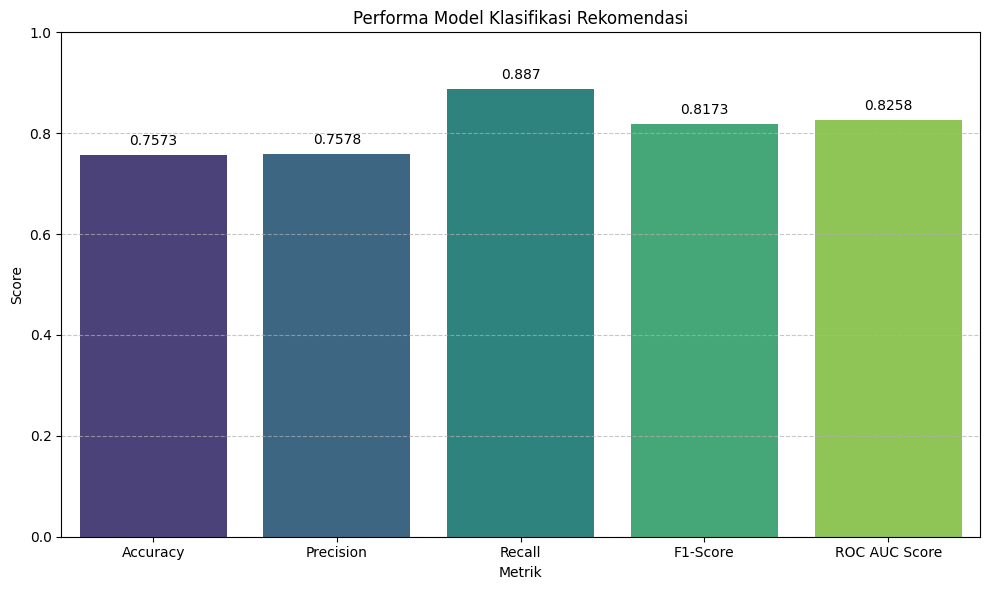

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Tambahkan impor pandas untuk DataFrame
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- Visualisasi Metrik Performa Model ---
print("\n--- Visualisasi Metrik Performa Model ---")

# Dapatkan kembali prediksi dari best_classifier pada X_test
y_pred = best_classifier.predict(X_test)
y_proba = best_classifier.predict_proba(X_test)[:, 1]

# Hitung metrik yang akan divisualisasikan
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "ROC AUC Score": roc_auc_score(y_test, y_proba)
}

metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", "Score"])

# Buat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", data=metrics_df, palette="viridis")
plt.ylim(0, 1) # Batasi sumbu Y dari 0 hingga 1
plt.title("Performa Model Klasifikasi Rekomendasi")
plt.ylabel("Score")
plt.xlabel("Metrik")
for index, row in metrics_df.iterrows():
    plt.text(row.name, row.Score + 0.02, round(row.Score, 4), color='black', ha="center") # Tampilkan nilai score
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **DEPLOYMENT**

In [45]:
import joblib

joblib.dump(best_classifier, 'best_classifier_model.pkl')

# Menyimpan DataFrame yang akan sering diakses atau dibutuhkan
movies.to_csv('streamlit_movies_df.csv', index=False)
ratings.to_csv('streamlit_ratings_df.csv', index=False)
user_latent_features_df.to_csv('streamlit_user_latent_features_df.csv', index=True) # userId sebagai index
item_latent_features_df.to_csv('streamlit_item_latent_features_df.csv', index=True) # movieId sebagai index
tags.to_csv('streamlit_movie_tag_features_df.csv', index=False) # Sudah punya movieId

# Menyimpan all_movie_features_df (sudah punya title, year, genre, tags, item latent)
all_movie_features_df.to_csv('streamlit_all_movie_features_df.csv', index=False)

# Menyimpan urutan kolom fitur
joblib.dump(feature_columns_order, 'feature_columns_order.pkl')

['feature_columns_order.pkl']